<a href="https://colab.research.google.com/github/sinapordanesh/ML-Mini-Projects/blob/main/Netflix%20Secrets/model_training_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Preprocessing
First, drop the movie_title column if it's only being used as an index and is not part of the feature set.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DATA/training_data.csv')
df.head()

,movie_title,available_globally,viewing_hours,release_month,runtime,imdb_rating,total_seasons,gn_drama,gn_action,gn_fantasy,...,up,us,war,we,who,wild,with,world,you,your
0,The Night Agent,1,812100000,3,30,7.5,2.0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ginny & Georgia,1,665100000,2,30,7.5,2.0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The Glory,1,622800000,12,30,8.1,1.0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Wednesday,1,507700000,11,30,8.1,2.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Queen Charlotte: A Bridgerton Story,1,503000000,5,30,7.4,1.0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.drop(['movie_title'], axis=1, inplace=True)

## 1. Correlation Analysis

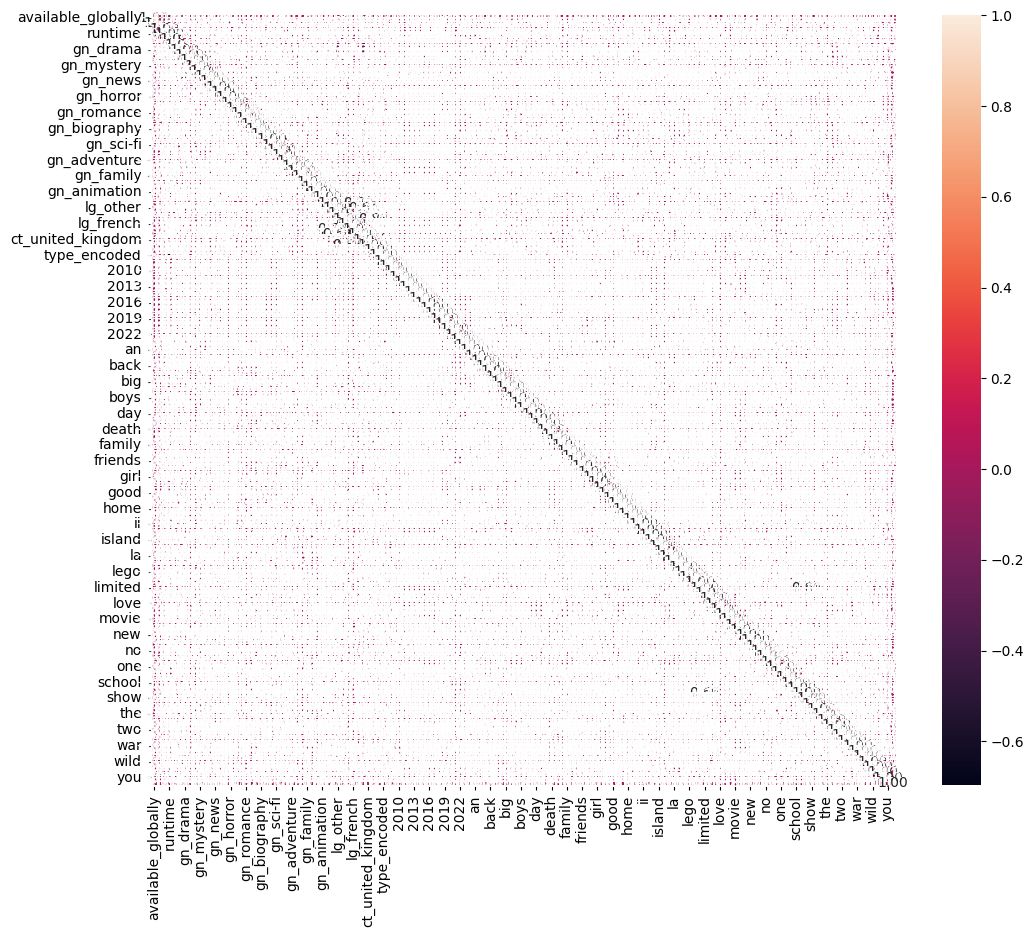

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()


## 2. Feature Importance from Models


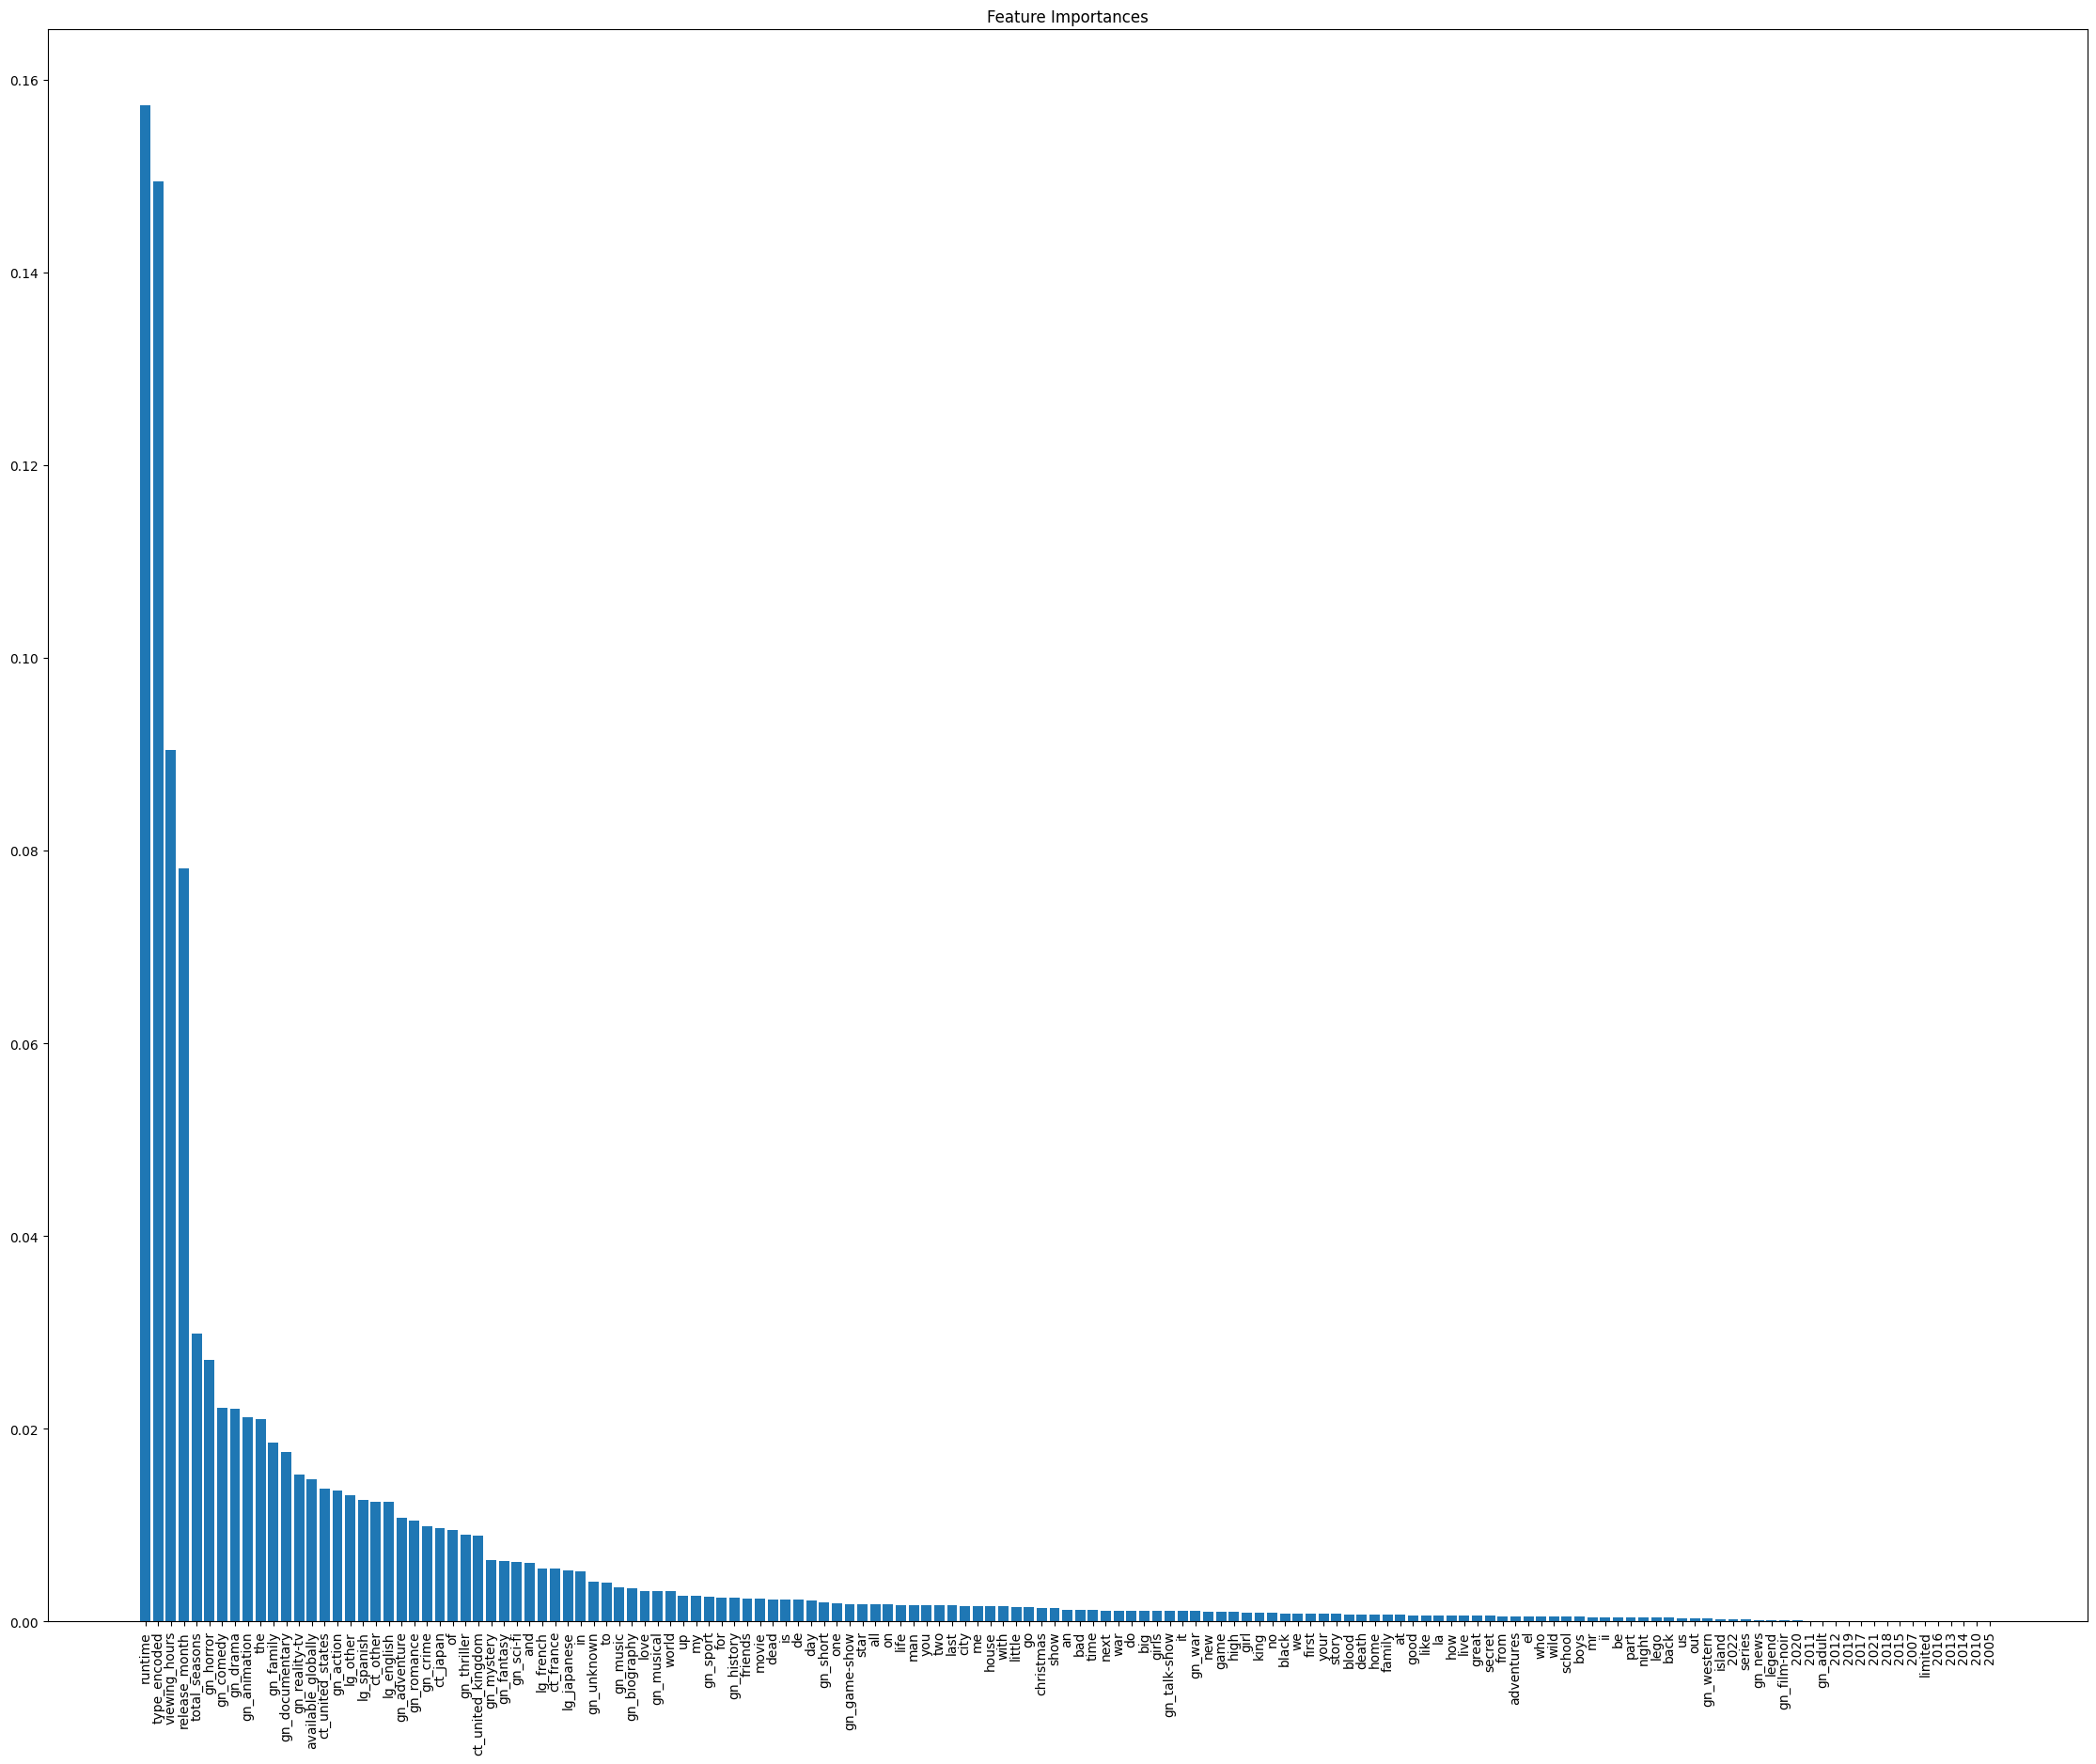

In [6]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# Assuming viewing_hours is the target
X = df.drop(['imdb_rating'], axis=1)
y = df['imdb_rating']

model = RandomForestRegressor()
model.fit(X, y)

# Increase the width and height of the figure
fig_width = 28  # Adjust this value as needed
fig_height = 22  # Adjust this value as needed

# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(fig_width, fig_height))  # Set the width and height here
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

# # Automatically adjust the layout to fit the content
# plt.tight_layout()

# # Save the plot as a PDF file
# with PdfPages('feature_importances.pdf') as pdf:
#     pdf.savefig()
#     plt.close()

# # Display the download link for the PDF file
# from IPython.display import FileLink
# FileLink('feature_importances.pdf')


## 3. Univariate Feature Selection


In [7]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]
print(selected_features)

Index(['runtime', 'total_seasons', 'gn_drama', 'gn_horror', 'gn_documentary',
       'gn_animation', 'lg_japanese', 'ct_other', 'ct_japan', 'type_encoded'],
      dtype='object')


The output from the Univariate feature selection using SelectKBest indicates that out of all the features in your dataset, the ones listed are the top 10 features that have the strongest relationship with the target variable according to the univariate statistical tests performed.

Here's what each feature in the list likely represents:

available_globally: Whether the movie/series is available globally or not.
runtime: The length of the movie/series.
imdb_rating: The IMDb rating of the movie/series.
total_seasons: The number of seasons for the series.
gn_drama: A binary indicator for the drama genre.
lg_english: A binary indicator for the English language.
ct_united_states: A binary indicator for the United States as the country of origin.
ct_other: A binary indicator for countries of origin other than those specifically listed in your dataset.
type_encoded: The encoded type of content (e.g., movie or series).
limited: This might refer to a feature extracted from the title, indicating whether the title contains the word "limited" or perhaps a feature indicating limited release or availability.

## 4. Recursive Feature Elimination (RFE)


In [8]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)
rfe.fit(X, y)
selected_rfe_features = X.columns[rfe.get_support(indices=True)]
print(selected_rfe_features)

Index(['viewing_hours', 'release_month', 'runtime', 'total_seasons',
       'gn_drama', 'gn_comedy', 'lg_other', 'ct_other', 'type_encoded', 'the'],
      dtype='object')


# Trainig model for predecting **imdb_rating**

In [ ]:
# Index(['available_globally', 'runtime', 'imdb_rating', 'total_seasons',
#        'gn_drama', 'lg_english', 'ct_united_states', 'ct_other',
#        'type_encoded', 'limited'],
#       dtype='object')

In [10]:
trainig_data = df[['imdb_rating', 'runtime', 'total_seasons', 'gn_drama', 'gn_horror', 'gn_documentary',
       'gn_animation', 'lg_japanese', 'ct_other', 'ct_japan', 'type_encoded']]

In [ ]:
# columns_to_drop = ['2005', '2007', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
#                    '2018', '2019', '2020', '2021', '2022', 'adventures', 'all', 'an', 'and', 'at',
#                    'back', 'bad', 'be', 'big', 'black', 'blood', 'boys', 'christmas', 'city', 'day',
#                    'de', 'dead', 'death', 'do', 'el', 'family', 'first', 'for', 'friends', 'from',
#                    'game', 'girl', 'girls', 'go', 'good', 'great', 'high', 'home', 'house', 'how',
#                    'ii', 'in', 'is', 'island', 'it', 'king', 'la', 'last', 'legend', 'lego', 'life',
#                    'like', 'limited', 'little', 'live', 'love', 'man', 'me', 'movie', 'mr', 'my',
#                    'new', 'next', 'night', 'no', 'of', 'on', 'one', 'out', 'part', 'school', 'secret',
#                    'series', 'show', 'star', 'story', 'the', 'time', 'to', 'two', 'up', 'us', 'war',
#                    'we', 'who', 'wild', 'with', 'world', 'you', 'your']

# df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# columns_to_drop = ['lg_english', 'lg_other', 'lg_spanish', 'lg_japanese', 'lg_french',
#                    'ct_united_states', 'ct_other', 'ct_united_kingdom', 'ct_japan', 'ct_france']

# df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# training_df = df[['available_globally', 'runtime', 'imdb_rating', 'total_seasons',
#        'gn_drama', 'lg_english', 'ct_united_states', 'ct_other',
#        'type_encoded']]

In [12]:
trainig_data.head()

,imdb_rating,runtime,total_seasons,gn_drama,gn_horror,gn_documentary,gn_animation,lg_japanese,ct_other,ct_japan,type_encoded
0,7.5,30,2.0,1,0,0,0,0,0,0,1
1,7.5,30,2.0,1,0,0,0,0,0,0,1
2,8.1,30,1.0,1,0,0,0,0,1,0,1
3,8.1,30,2.0,0,0,0,0,0,0,0,1
4,7.4,30,1.0,1,0,0,0,0,0,0,1


In [13]:
from sklearn.model_selection import train_test_split

X = trainig_data.drop(['imdb_rating'], axis=1)
y_imdb_rating = trainig_data['imdb_rating']
# y_imdb_rating = df['imdb_rating']

X_train, X_test, y_train_vh, y_test_vh = train_test_split(X, y_imdb_rating, test_size=0.2, random_state=42)
# _, _, y_train_ir, y_test_ir = train_test_split(X, y_imdb_rating, test_size=0.2, random_state=42)


In [14]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [15]:
# For Viewing Hours
rf_vh = RandomForestRegressor(random_state=42)
lr_vh = LinearRegression()
gbr_vh = GradientBoostingRegressor(random_state=42)
poly_vh = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# # For IMDb Rating
# rf_ir = RandomForestRegressor(random_state=42)
# lr_ir = LinearRegression()
# gbr_ir = GradientBoostingRegressor(random_state=42)
# poly_ir = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())


In [16]:
# Training on Viewing Hours
rf_vh.fit(X_train, y_train_vh)
lr_vh.fit(X_train, y_train_vh)
gbr_vh.fit(X_train, y_train_vh)
poly_vh.fit(X_train, y_train_vh)

# # Training on IMDb Rating
# rf_ir.fit(X_train, y_train_ir)
# lr_ir.fit(X_train, y_train_ir)
# gbr_ir.fit(X_train, y_train_ir)
# poly_ir.fit(X_train, y_train_ir)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Define a function for evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Evaluate models for Viewing Hours
mse_rf_vh, r2_rf_vh = evaluate_model(rf_vh, X_test, y_test_vh)
mse_lr_vh, r2_lr_vh = evaluate_model(lr_vh, X_test, y_test_vh)
mse_gbr_vh, r2_gbr_vh = evaluate_model(gbr_vh, X_test, y_test_vh)
mse_poly_vh, r2_poly_vh = evaluate_model(poly_vh, X_test, y_test_vh)

# # Evaluate models for IMDb Rating
# mse_rf_ir, r2_rf_ir = evaluate_model(rf_ir, X_test, y_test_ir)
# mse_lr_ir, r2_lr_ir = evaluate_model(lr_ir, X_test, y_test_ir)
# mse_gbr_ir, r2_gbr_ir = evaluate_model(gbr_ir, X_test, y_test_ir)
# mse_poly_ir, r2_poly_ir = evaluate_model(poly_ir, X_test, y_test_ir)

# Print results (you can format this into a table or more readable format)
print("Viewing Hours - RF: MSE =", mse_rf_vh, "R2 =", r2_rf_vh)
print("Viewing Hours - LR: MSE =", mse_lr_vh, "R2 =", r2_lr_vh)
print("Viewing Hours - GBR: MSE =", mse_gbr_vh, "R2 =", r2_gbr_vh)
print("Viewing Hours - Poly: MSE =", mse_poly_vh, "R2 =", r2_poly_vh)

# print("IMDb Rating - RF: MSE =", mse_rf_ir, "R2 =", r2_rf_ir)
# print("IMDb Rating - LR: MSE =", mse_lr_ir, "R2 =", r2_lr_ir)
# print("IMDb Rating - GBR: MSE =", mse_gbr_ir, "R2 =", r2_gbr_ir)
# print("IMDb Rating - Poly: MSE =", mse_poly_ir, "R2 =", r2_poly_ir)


Viewing Hours - RF: MSE = 0.5804386775833776 R2 = 0.3644880322318207
Viewing Hours - LR: MSE = 0.7077523640643089 R2 = 0.225094544953924
Viewing Hours - GBR: MSE = 0.5964187245982654 R2 = 0.346991763434329
Viewing Hours - Poly: MSE = 0.6759518349236564 R2 = 0.2599123777944008
